# Numpy Supermarket Data Analysis

## Problem Statement

### The Numpy supermarket chain, operating in Windhoek and across Namibia, is facing challenges in making data-driven decisions to improve business performance. Despite having vast amounts of customer transaction data, this data is underutilized. This limits the supermarket's ability to:

* Improve service delivery,
* Optimize product offerings, and
* Enhance customer satisfaction and loyalty.
  
### By leveraging data analytics techniques such as data cleaning, preprocessing, predictive modeling, and ongoing evaluation, the supermarket aims to unlock insights from customer spending behavior to drive better decision-making and improve overall business performance.

# ______________________________________________________________________________________

# Data Analysis

## Import libraries

In [1118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import statistics as stat
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import joblib 

from matplotlib.ticker import FuncFormatter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



## Import Dataset

In [1124]:
#Extracting dataset Locally
FileLocation =('C:\\CustomerSpendDataPython.csv')

#setting dataset display variables--customize how dataFrame will be displayed
pd.set_option('display.max_columns', None) #set the maximum number of columns
pd.set_option('display.width', 1000)#sets the display width for the output
pd.set_option('display.expand_frame_repr', False)#prevents DataFrames from being split across multiple lines
pd.set_option('display.max_colwidth', 30)  # Set max column width if necessary
NumpyDf =pd.read_csv(FileLocation)
NumpyDf

,CustomerID,Date,Time,StoreLocation,ProductID,ProductName,ProductCategory,Quantity,UnitPrice,PaymentMethod,CustomerAge,CustomerGender,CustomerFeedback,DiscountApplied,MembershipStatus,Country
0,898.0,20-Mar-23,18:49:52,Walvis Bay,3239.0,Laptop,Electronics,1.0,16095.79,Credit Card,75.0,Male,Highly recommend,No,Member,Namibia
1,1168.0,7-May-23,4:05:41,Khomasdal,7120.0,Laptop,Electronics,1.0,19152.94,Mobile Payment,56.0,Other,Poor service,No,Member,Namibia
2,165.0,28-Jun-23,10:33:17,Windhoek Central,6477.0,Bread,Grocery,2.0,20.93,Mobile Payment,32.0,Other,Highly recommend,Yes,Member,Namibia
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1715.0,14-Feb-23,14:03:22,Windhoek Central,1028.0,Milk,Grocery,2.0,27,Mobile Payment,70.0,Female,Poor service,Yes,Non-member,Namibia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,908.0,5-Jan-23,6:39:57,Swakopmund,3589.0,Eggs,Grocery,3.0,53.29,Mobile Payment,44.0,Male,Good quality,Yes,Member,Namibia
2299,2289.0,27-Mar-23,18:59:57,Swakopmund,9231.0,Hat,Clothing,3.0,217.51,Cash,60.0,Female,Will not visit again,No,Member,Namibia
2300,1741.0,13-May-23,12:20:01,Katutura,6550.0,Jacket,Clothing,1.0,679.07,Debit Card,32.0,Other,Will not visit again,Yes,Member,Namibia
2301,2324.0,8-Mar-23,18:10:04,Katutura,8524.0,Pants,Clothing,5.0,156.86,Mobile Payment,26.0,Male,Average experience,Yes,Non-member,Namibia


# Data Visualization

## Display columns

### Display a list of columns in our data frame

In [1126]:
#read CSV file from the location specified by "Filelocation"
NumpyDf =pd.read_csv(FileLocation)
print(list(NumpyDf .columns)) #list converts the column labels (which are typically indexd table format) into a regular Python list.


['CustomerID', 'Date', 'Time', 'StoreLocation', 'ProductID', 'ProductName', 'ProductCategory', 'Quantity', 'UnitPrice', 'PaymentMethod', 'CustomerAge', 'CustomerGender', 'CustomerFeedback', 'DiscountApplied', 'MembershipStatus', 'Country']


## Drop Unused Columns

In [1128]:
DroppedColumn = NumpyDf.drop(columns='Country')
print(list(DroppedColumn.columns))

['CustomerID', 'Date', 'Time', 'StoreLocation', 'ProductID', 'ProductName', 'ProductCategory', 'Quantity', 'UnitPrice', 'PaymentMethod', 'CustomerAge', 'CustomerGender', 'CustomerFeedback', 'DiscountApplied', 'MembershipStatus']


## Check data types of all columns before preprocessing
### This helps us to understand the data types of the DataFrame columns and allows us to decide if we need to transform or clean the data for further analysis.

In [1132]:
print(NumpyDf.dtypes)#returns the data types of all the columns in the DataFrame.

CustomerID          float64
Date                 object
Time                 object
StoreLocation        object
ProductID           float64
ProductName          object
ProductCategory      object
Quantity            float64
UnitPrice            object
PaymentMethod        object
CustomerAge         float64
CustomerGender       object
CustomerFeedback     object
DiscountApplied      object
MembershipStatus     object
Country              object
dtype: object


## Convert data types to appropriate types

In [1138]:
#Fill in missing values
NumpyDf['CustomerAge'] = NumpyDf['CustomerAge'].fillna(0)
NumpyDf['CustomerID'] = NumpyDf['CustomerID'].fillna(0)
NumpyDf['ProductID'] = NumpyDf['ProductID'].fillna(0)
NumpyDf['Quantity'] = NumpyDf['Quantity'].fillna(0)


NumpyDf['CustomerID'] = NumpyDf['CustomerID'].astype(int)     # Convert to int
NumpyDf['ProductID'] = NumpyDf['ProductID'].astype(int)       # Convert to int
NumpyDf['Quantity'] = NumpyDf['Quantity'].astype(int)         # Convert to int
NumpyDf['CustomerAge'] = NumpyDf['CustomerAge'].astype(float)

NumpyDf['Date'] = pd.to_datetime(NumpyDf['Date'], errors='coerce')  # Convert to datetime
NumpyDf['Time'] = pd.to_timedelta(NumpyDf['Time'], errors='coerce')  # Convert to timedelta if time is stored correctly


# Displaying the data types of the DataFrame after conversion
print("\nData types after conversion:")
print(NumpyDf.dtypes)


Data types after conversion:
CustomerID                    int32
Date                 datetime64[ns]
Time                timedelta64[ns]
StoreLocation                object
ProductID                     int32
ProductName                  object
ProductCategory              object
Quantity                      int32
UnitPrice                    object
PaymentMethod                object
CustomerAge                 float64
CustomerGender               object
CustomerFeedback             object
DiscountApplied              object
MembershipStatus             object
Country                      object
dtype: object


# Column understanding

### Accessing individual columns

In [1072]:
# Create a DataFrame from the data
NumpyDf =pd.read_csv(FileLocation)

# Accessing Products column
print("\nProduct Name Column:")
print(NumpyDf['ProductName'])

#Accessing membership status column 
print("\nMembership Status Count:")
membership_counts = NumpyDf['MembershipStatus'].value_counts(dropna=False)
print(membership_counts)




Product Name Column:
0       Laptop
1       Laptop
2        Bread
3          NaN
4         Milk
         ...  
2298      Eggs
2299       Hat
2300    Jacket
2301     Pants
2302    Cheese
Name: ProductName, Length: 2303, dtype: object

Membership Status Count:
MembershipStatus
Member        1152
Non-member    1148
NaN              3
Name: count, dtype: int64


## Understanding the 'Location' column

In [1056]:
# How many unique locations are there?
print("\nNumber of unique locations:")
print(NumpyDf['StoreLocation'].nunique())

# What are the unique locations?
print("\nUnique locations:")
print(NumpyDf['StoreLocation'].unique())

# Count how many products are from each location
print("\nCount of products by location:")
print(NumpyDf['StoreLocation'].value_counts())



Number of unique locations:
5

Unique locations:
['Walvis Bay' 'Khomasdal' 'Windhoek Central' nan 'Swakopmund' 'Katutura']

Count of products by location:
StoreLocation
Walvis Bay          483
Khomasdal           465
Katutura            465
Swakopmund          457
Windhoek Central    430
Name: count, dtype: int64


## Displaying total revenue of locations

In [1058]:
# Load the data 
csv_file_path = FileLocation  # Update the path to your CSV file
data = pd.read_csv(csv_file_path)

# Fill missing values 
data.fillna({'Quantity': 0, 'UnitPrice': 0}, inplace=True)

# Ensure 'UnitPrice' and 'Quantity' are numeric
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Calculate Total Revenue for each transaction
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']

# Group by Store Location to calculate the total revenue for each location
total_revenue_by_location = data.groupby('StoreLocation')['TotalRevenue'].sum().reset_index()

# Display the total revenue by location
print("\nTotal Revenue by Store Location:")
print(total_revenue_by_location)


Total Revenue by Store Location:
      StoreLocation  TotalRevenue
0          Katutura    1633511.28
1         Khomasdal    1492391.71
2        Swakopmund    2004275.31
3        Walvis Bay    2059838.67
4  Windhoek Central    1584029.15


# _____________________________________________________________________________________

# Data Cleansing and Preprocessing

# Original Numpy Supermarket Data Frame

In [1060]:
# Creating a DataFrame from the data
NumpyDf =pd.read_csv(FileLocation)

print("Original DataFrame")
NumpyDf

Original DataFrame


,CustomerID,Date,Time,StoreLocation,ProductID,ProductName,ProductCategory,Quantity,UnitPrice,PaymentMethod,CustomerAge,CustomerGender,CustomerFeedback,DiscountApplied,MembershipStatus,Country
0,898.0,20-Mar-23,18:49:52,Walvis Bay,3239.0,Laptop,Electronics,1.0,16095.79,Credit Card,75.0,Male,Highly recommend,No,Member,Namibia
1,1168.0,7-May-23,4:05:41,Khomasdal,7120.0,Laptop,Electronics,1.0,19152.94,Mobile Payment,56.0,Other,Poor service,No,Member,Namibia
2,165.0,28-Jun-23,10:33:17,Windhoek Central,6477.0,Bread,Grocery,2.0,20.93,Mobile Payment,32.0,Other,Highly recommend,Yes,Member,Namibia
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1715.0,14-Feb-23,14:03:22,Windhoek Central,1028.0,Milk,Grocery,2.0,27,Mobile Payment,70.0,Female,Poor service,Yes,Non-member,Namibia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,908.0,5-Jan-23,6:39:57,Swakopmund,3589.0,Eggs,Grocery,3.0,53.29,Mobile Payment,44.0,Male,Good quality,Yes,Member,Namibia
2299,2289.0,27-Mar-23,18:59:57,Swakopmund,9231.0,Hat,Clothing,3.0,217.51,Cash,60.0,Female,Will not visit again,No,Member,Namibia
2300,1741.0,13-May-23,12:20:01,Katutura,6550.0,Jacket,Clothing,1.0,679.07,Debit Card,32.0,Other,Will not visit again,Yes,Member,Namibia
2301,2324.0,8-Mar-23,18:10:04,Katutura,8524.0,Pants,Clothing,5.0,156.86,Mobile Payment,26.0,Male,Average experience,Yes,Non-member,Namibia


##  Handling rows with missing values, NaN

In [1062]:
# Removing rows with missing values NaN
cleaned_df_dropna = NumpyDf.dropna()
print("\nDataFrame after removing rows with missing values (NaN Values):")
cleaned_df_dropna


DataFrame after removing rows with missing values (NaN Values):


,CustomerID,Date,Time,StoreLocation,ProductID,ProductName,ProductCategory,Quantity,UnitPrice,PaymentMethod,CustomerAge,CustomerGender,CustomerFeedback,DiscountApplied,MembershipStatus,Country
0,898.0,20-Mar-23,18:49:52,Walvis Bay,3239.0,Laptop,Electronics,1.0,16095.79,Credit Card,75.0,Male,Highly recommend,No,Member,Namibia
1,1168.0,7-May-23,4:05:41,Khomasdal,7120.0,Laptop,Electronics,1.0,19152.94,Mobile Payment,56.0,Other,Poor service,No,Member,Namibia
2,165.0,28-Jun-23,10:33:17,Windhoek Central,6477.0,Bread,Grocery,2.0,20.93,Mobile Payment,32.0,Other,Highly recommend,Yes,Member,Namibia
4,1715.0,14-Feb-23,14:03:22,Windhoek Central,1028.0,Milk,Grocery,2.0,27,Mobile Payment,70.0,Female,Poor service,Yes,Non-member,Namibia
5,476.0,26-Jan-23,4:36:24,Windhoek Central,7552.0,Eggs,Grocery,3.0,43.96,Debit Card,50.0,Other,Highly recommend,Yes,Member,Namibia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,908.0,5-Jan-23,6:39:57,Swakopmund,3589.0,Eggs,Grocery,3.0,53.29,Mobile Payment,44.0,Male,Good quality,Yes,Member,Namibia
2299,2289.0,27-Mar-23,18:59:57,Swakopmund,9231.0,Hat,Clothing,3.0,217.51,Cash,60.0,Female,Will not visit again,No,Member,Namibia
2300,1741.0,13-May-23,12:20:01,Katutura,6550.0,Jacket,Clothing,1.0,679.07,Debit Card,32.0,Other,Will not visit again,Yes,Member,Namibia
2301,2324.0,8-Mar-23,18:10:04,Katutura,8524.0,Pants,Clothing,5.0,156.86,Mobile Payment,26.0,Male,Average experience,Yes,Non-member,Namibia


## Handling Duplicate values

In [1064]:
# Removing Duplicates
NumpyDf_cleaned = NumpyDf.drop_duplicates()
print("\nDataFrame after removing duplicates:")
NumpyDf_cleaned


DataFrame after removing duplicates:


,CustomerID,Date,Time,StoreLocation,ProductID,ProductName,ProductCategory,Quantity,UnitPrice,PaymentMethod,CustomerAge,CustomerGender,CustomerFeedback,DiscountApplied,MembershipStatus,Country
0,898.0,20-Mar-23,18:49:52,Walvis Bay,3239.0,Laptop,Electronics,1.0,16095.79,Credit Card,75.0,Male,Highly recommend,No,Member,Namibia
1,1168.0,7-May-23,4:05:41,Khomasdal,7120.0,Laptop,Electronics,1.0,19152.94,Mobile Payment,56.0,Other,Poor service,No,Member,Namibia
2,165.0,28-Jun-23,10:33:17,Windhoek Central,6477.0,Bread,Grocery,2.0,20.93,Mobile Payment,32.0,Other,Highly recommend,Yes,Member,Namibia
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1715.0,14-Feb-23,14:03:22,Windhoek Central,1028.0,Milk,Grocery,2.0,27,Mobile Payment,70.0,Female,Poor service,Yes,Non-member,Namibia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,908.0,5-Jan-23,6:39:57,Swakopmund,3589.0,Eggs,Grocery,3.0,53.29,Mobile Payment,44.0,Male,Good quality,Yes,Member,Namibia
2299,2289.0,27-Mar-23,18:59:57,Swakopmund,9231.0,Hat,Clothing,3.0,217.51,Cash,60.0,Female,Will not visit again,No,Member,Namibia
2300,1741.0,13-May-23,12:20:01,Katutura,6550.0,Jacket,Clothing,1.0,679.07,Debit Card,32.0,Other,Will not visit again,Yes,Member,Namibia
2301,2324.0,8-Mar-23,18:10:04,Katutura,8524.0,Pants,Clothing,5.0,156.86,Mobile Payment,26.0,Male,Average experience,Yes,Non-member,Namibia


# Customer Breakdown 
### The below shows a breakdown of customer volumes and their respective gender

In [1140]:
#Total customer count
TotalCustomerBase=(DroppedColumn['CustomerID'].count())
print('The total customer base accross all regions amounts to: '+str(TotalCustomerBase))

#Gender Split
GenderSplit = DroppedColumn['CustomerGender'].value_counts()
print(GenderSplit)

The total customer base accross all regions amounts to: 2300
CustomerGender
Other     790
Male      765
Female    745
Name: count, dtype: int64


## Plotting customer gender info on Pie Chart

The total customer base accross all regions amounts to: 2300
CustomerGender
Other     790
Male      765
Female    745
Name: count, dtype: int64


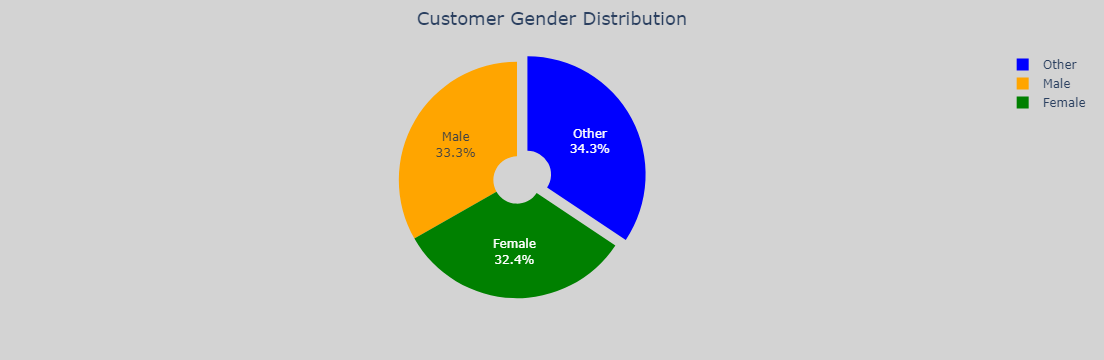

In [1142]:
TotalCustomerBase=(DroppedColumn['CustomerID'].count())
print('The total customer base accross all regions amounts to: '+str(TotalCustomerBase))

#Gender Split
GenderSplit = DroppedColumn['CustomerGender'].value_counts()
print(GenderSplit)

# Create a DataFrame for Plotly
NumpyDf = pd.DataFrame({
    'Gender': GenderSplit.index,
    'Count': GenderSplit.values
})

# Create an interactive pie chart with Plotly
fig = px.pie(NumpyDf, 
             values='Count', 
             names='Gender', 
             title='Customer Gender Distribution', 
             color_discrete_sequence=['blue', 'orange', 'green'],  # Colors for the pie segments
             hole=0.2)  # Adds a donut hole for style

# Style the chart
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0], hoverinfo='label+percent+value')

# Set figure background color
fig.update_layout(
    paper_bgcolor='lightgrey',  # Background color
    showlegend=True,
    title_font_size=18,
    title_x=0.5,  # Center the title
    margin=dict(t=50, b=50, l=50, r=50)  # Set margins
)

# Show the pie chart
fig.show()



# Poduct Category Breakdown

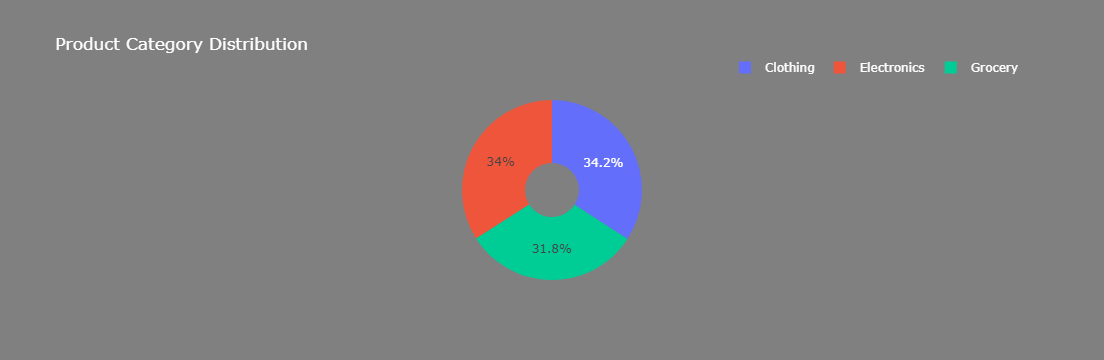

In [1144]:
# Create frequency table for 'ProductCategory'
frequency_table = DroppedColumn['ProductCategory'].value_counts()

# Prepare data for the pie chart
labels = frequency_table.index
values = frequency_table.values

# Create an interactive pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])

# Update layout
fig.update_layout(
    title='Product Category Distribution',
    paper_bgcolor='grey',  # Background color for the entire figure
    plot_bgcolor='grey',   # Background color for the plot area
    font=dict(color='white'),  # Text color
    legend=dict(orientation='h', yanchor='bottom', y=1.1, xanchor='right', x=1)  # Adjust legend position
)

# Show the plot
fig.show()





# Calculating the total revenue for each transaction
# Group and display transactions by date

In [1146]:
# Convert 'UnitPrice' and 'Quantity' to numeric, forcing errors to NaN
DroppedColumn['UnitPrice'] = pd.to_numeric(DroppedColumn['UnitPrice'], errors='coerce')
DroppedColumn['Quantity'] = pd.to_numeric(DroppedColumn['Quantity'], errors='coerce')

# Calculate 'TotalRevenue'
DroppedColumn['TotalRevenue'] = DroppedColumn['UnitPrice'] * DroppedColumn['Quantity']

# Group by 'Date' and sum 'TotalRevenue'
revenue_by_date = DroppedColumn.groupby('Date')['TotalRevenue'].sum().reset_index()

print(revenue_by_date)

         Date  TotalRevenue
0    1-Apr-23       1991.81
1    1-Feb-23      27400.25
2    1-Jan-23      52077.11
3    1-Jun-23      21923.43
4    1-Mar-23      55332.99
..        ...           ...
176  9-Feb-23     137804.97
177  9-Jan-23      25176.73
178  9-Jun-23      26155.15
179  9-Mar-23      47632.83
180  9-May-23       6425.19

[181 rows x 2 columns]


# Display total revenue by date on bar chart

C:\Users\Reque\AppData\Local\Temp\ipykernel_18072\3137588290.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



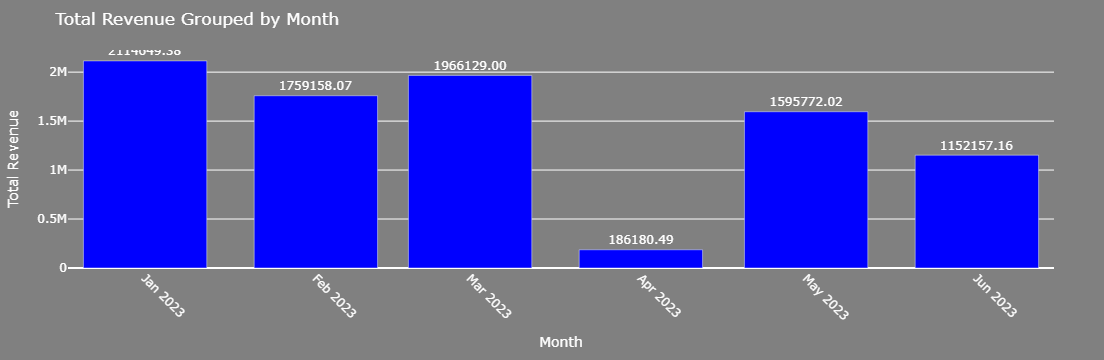

In [1148]:
#Ensure 'Date' is in datetime format
DroppedColumn['Date'] = pd.to_datetime(DroppedColumn['Date'])

#Extract month and year, and create a new 'MonthYear' column
DroppedColumn['MonthYear'] = DroppedColumn['Date'].dt.to_period('M')  # 'M' stands for month

#Group by 'MonthYear' and sum the total revenue
revenue_by_month = DroppedColumn.groupby('MonthYear')['TotalRevenue'].sum().reset_index()

#Convert 'MonthYear' back to string for plotting
revenue_by_month['MonthYear'] = revenue_by_month['MonthYear'].astype(str)

#Plot the bar graph using Plotly
fig = go.Figure()

#Add bar chart to the figure
fig.add_trace(go.Bar(
    x=revenue_by_month['MonthYear'],
    y=revenue_by_month['TotalRevenue'],
    marker_color='blue',
    text=revenue_by_month['TotalRevenue'].apply(lambda x: f"{x:.2f}"),  # Format to 2 decimal places
    textposition='outside',  # Position text outside the bars
    name='Total Revenue'
))

# Update layout
fig.update_layout(
    title='Total Revenue Grouped by Month',
    xaxis_title='Month',
    yaxis_title='Total Revenue',
    plot_bgcolor='grey',  # Background color for the plot area
    paper_bgcolor='grey',  # Background color for the entire figure
    font=dict(color='white'),
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better visibility
    yaxis=dict(showgrid=True, gridcolor='white'),  # Set grid color for y-axis
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins to ensure labels fit
)

# Show the plot
fig.show()



# Displaying total revenue by Gender on Wisker box plot

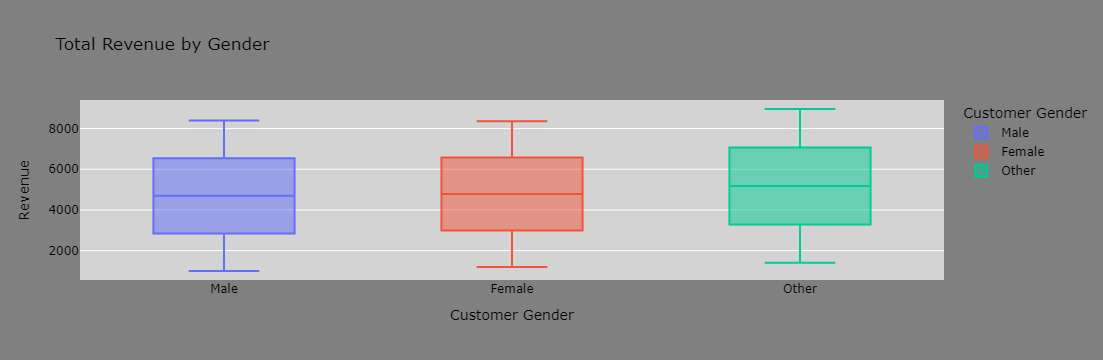

In [852]:
# Initialize data
data = {
    'Gender': ['Male'] * 740 + ['Female'] * 717 + ['Other'] * 757,
    'TotalRevenue': [1000 + i * 10 for i in range(740)] +  # Synthetic revenue data for 'Male'
                     [1200 + i * 10 for i in range(717)] +  # Synthetic revenue data for 'Female'
                     [1400 + i * 10 for i in range(757)]    # Synthetic revenue data for 'Other'
}
# The synthetic values are created using a range of values to simulate variability within each gender group.

# Create a DataFrame
NumpDf = pd.DataFrame(data)

# Create a box plot (whisker plot)
fig = px.box(NumpDf, x='Gender', y='TotalRevenue', title='Total Revenue by Gender', 
             labels={'TotalRevenue': 'Revenue', 'Gender': 'Customer Gender'}, 
             color='Gender')

# Customize the layout
fig.update_layout(
    plot_bgcolor='lightgrey',  # Background color for the plot area
    paper_bgcolor='grey',  # Background color for the entire figure
    font=dict(color='black'),  # Set font color to white for better visibility
)

# Show the plot
fig.show()


# Calculate total revenue from January - July 2023

In [1151]:
DroppedColumn['TotalRevenue'] = DroppedColumn['TotalRevenue'].astype(float)
sum=DroppedColumn['TotalRevenue'].sum()
formatted_total_revenue_sum = "{:,.2f}".format(sum)
print("The Total Revenue generated from January - July 2023 is: "+formatted_total_revenue_sum)

The Total Revenue generated from January - July 2023 is: 8,774,046.12


## Calculate mean revenue generated for January - July 2023

In [1153]:
mean=DroppedColumn['TotalRevenue'].mean()
formatedmean = "{:,.2f}".format(mean)
print("The mean (Average) revenue generated from January - July 2023 is "+formatedmean)

The mean (Average) revenue generated from January - July 2023 is 3,962.98


## Normal Distribution of total revenue generated

The mean (Average) revenue generated from January - July 2023 is 3,962.98


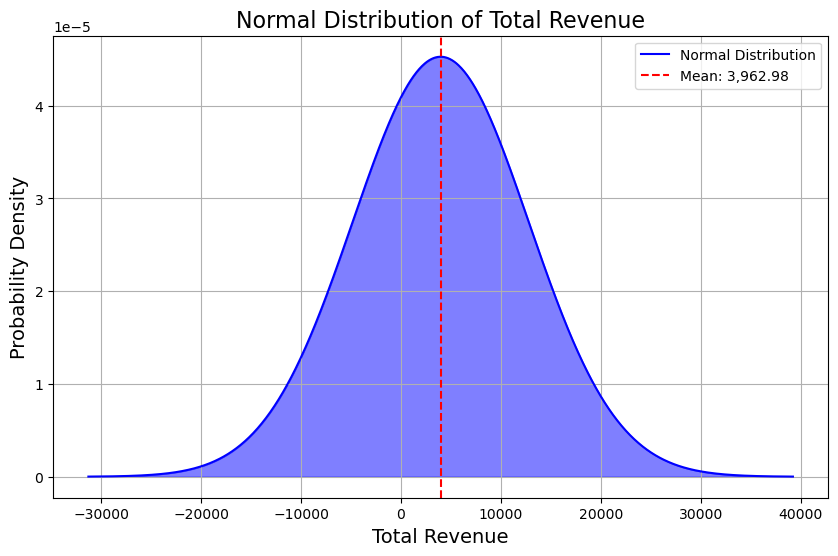

In [1155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Sample DataFrame - Replace with your actual DroppedColumn DataFrame
# Assuming DroppedColumn has been preloaded with relevant columns
# DroppedColumn = pd.DataFrame(...)

# Calculate mean and standard deviation
mean = DroppedColumn['TotalRevenue'].mean()
std_dev = DroppedColumn['TotalRevenue'].std()

# Print formatted mean
formatted_mean = "{:,.2f}".format(mean)
print("The mean (Average) revenue generated from January - July 2023 is " + formatted_mean)

# Generate data points for the normal distribution
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)  # Probability Density Function

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='Normal Distribution')
plt.fill_between(x, y, alpha=0.5, color='blue')

# Mark the mean on the plot
plt.axvline(mean, color='red', linestyle='--', label='Mean: ' + formatted_mean)

# Titles and labels
plt.title('Normal Distribution of Total Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend()
plt.grid()
plt.show()


# Machine Learning Algorithms

## Random Forest Regression Model 

# Objective

#### Develop a predictive model using a Random Forest Regressor to estimate the Total Revenue generated from various sales transactions based on multiple features. The goal is to utilize historical sales data to understand and forecast revenue patterns, which can inform decision-making processes in a retail context.

#### By deploying this algorithm, businesses can gain insights into revenue trends, optimize pricing strategies, and make informed decisions regarding inventory management and marketing campaigns. The predictive capabilities of the model can enhance operational efficiency and contribute to increased profitability in a competitive retail environment.

In [1157]:
#Extracting dataset Locally
FileLocation =('C:\\CustomerSpendDataPython.csv')

#setting dataset display variables--customize how dataFrame will be displayed
pd.set_option('display.max_columns', None) #set the maximum number of columns
pd.set_option('display.width', 1000)#sets the display width for the output
pd.set_option('display.expand_frame_repr', False)#prevents DataFrames from being split across multiple lines
pd.set_option('display.max_colwidth', 30)  # Set max column width if necessary


In [1161]:
NumpyDf =pd.read_csv(FileLocation)

#filling missing values in the DroppedColumn DataFrame
#Missing values in the Customer Age column are filled with the median age from the existing values. 
#The median is chosen to minimize the impact of outliers.
DroppedColumn.fillna({'CustomerAge': DroppedColumn['CustomerAge'].median(), 'Quantity': 0, 'UnitPrice': 0}, inplace=True)

#Define features and target variable
#features contains the independent variables (predictors) used to predict the target variable.
#target variable (TotalRevenue) is the dependent variable we want to predict.
features = ['StoreLocation', 'ProductCategory', 'Quantity', 'UnitPrice', 'CustomerAge', 'PaymentMethod', 'CustomerGender', 'DiscountApplied', 'MembershipStatus']
target = 'TotalRevenue'

#removes any rows from DroppedColumn where the target variable (TotalRevenue) is missing (NaN).
DroppedColumn = DroppedColumn[~DroppedColumn[target].isna()]

#Splitting the Data into Features and Target
X = DroppedColumn[features]
y = DroppedColumn[target]

#identifying which features are categorical (non-numeric) and which are numeric for preprocessing.
categorical_features = ['StoreLocation', 'ProductCategory', 'PaymentMethod', 'CustomerGender', 'DiscountApplied', 'MembershipStatus']
numeric_features = ['Quantity', 'UnitPrice', 'CustomerAge']

#This ColumnTransformer applies different preprocessing steps to numeric and categorical features:
#Numeric Features: The StandardScaler standardizes numeric features (mean = 0, standard deviation = 1).
#Categorical Features: The OneHotEncoder converts categorical variables into a format that can be provided to ML algorithms to improve predictions.
#Using drop='first' avoids multicollinearity by dropping the first category.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define the model (Random Forest Regressor in this case)
#This code creates a Pipeline that sequentially applies the preprocessor followed by the RandomForestRegressor model.
#n_estimators=100: The random forest will consist of 100 decision trees.
#random_state=42: Ensures reproducibility of results
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#Train-Test Split
#This function splits the dataset into training (70%) and testing (30%) sets,
#ensuring that the model can be trained and then evaluated on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train the model
#The model is trained on the training dataset, learning the relationship between the features and the target variable.
model.fit(X_train, y_train)

# Evaluate the model
#_pred: The model predicts the target variable using the test set features.
#mse: Calculates the Mean Squared Error between the actual and predicted values.
#r2: Calculates the R² score, which indicates how well the model explains the variability of the target variable.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Mean Squared Error and R² Score with two decimal points
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

#Save the model to a file (Deployment)
joblib.dump(model, 'revenue_prediction_model.pkl')
print("Model saved successfully!")


Mean Squared Error: 55122.99
R^2 Score: 1.00
Model saved successfully!


#### MSE focuses on the accuracy of the predictions, especially penalizing large errors, which makes it a good choice for understanding how close the   predictions are to the actual values.
#### R² score is useful for understanding the goodness of fit, i.e., how much of the variation in the target variable is captured by the model.

# Prediction model for Random Forest Regression

In [1163]:
loaded_model = joblib.load('revenue_prediction_model.pkl')

# Predicting on new data
new_data = pd.DataFrame({
    'StoreLocation': ['Khomasdal'],
    'ProductCategory': ['Grocery'],
    'Quantity': [5],
    'UnitPrice': [1000],
    'CustomerAge': [30],
    'PaymentMethod': ['Mobile Payment'],
    'CustomerGender': ['Female'],
    'DiscountApplied': ['Yes'],
    'MembershipStatus': ['Member']
})

# Make prediction
prediction = loaded_model.predict(new_data)
predicted_revenue = prediction[0]
print(f"Predicted Total Revenue: {predicted_revenue:.2f}")

Predicted Total Revenue: 3783.05


# ___________________________________________________________________

# Linear Regression Model

 ### The goal is to predict total revenue based on factors such as product category, location, and customer demographics, enabling the Numpy Supermarket to make informed inventory and marketing decisions.

## Objective 
### Deploy a linear regression model to predict the total revenue based on relevant features. This model can help the supermarket identify which factors most influence revenue generation and allow for better decision-making regarding inventory and promotions.

In [1165]:
# Fill missing values
DroppedColumn.fillna({'CustomerAge': DroppedColumn['CustomerAge'].median(), 
                      'Quantity': 0, 
                      'UnitPrice': 0}, inplace=True)

# Define features and target variable
features = ['StoreLocation', 'ProductCategory', 'Quantity', 'UnitPrice', 
            'CustomerAge', 'PaymentMethod', 'CustomerGender', 'DiscountApplied', 
            'MembershipStatus']
target = 'TotalRevenue'

X = DroppedColumn[features]
y = DroppedColumn[target]

# Preprocessing - OneHotEncode categorical features, standardize numeric features
categorical_features = ['StoreLocation', 'ProductCategory', 'PaymentMethod', 
                        'CustomerGender', 'DiscountApplied', 'MembershipStatus']
numeric_features = ['Quantity', 'UnitPrice', 'CustomerAge']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define the model (Linear Regression in this case)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  
])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Save the model to a file (Deployment)
joblib.dump(model, 'linear_regression_revenue_prediction_model.pkl')


Mean Squared Error: 7925756.74
R^2 Score: 0.89


['linear_regression_revenue_prediction_model.pkl']

# Prediction model for Linear Regression

In [1167]:
# Load the model
loaded_model = joblib.load('linear_regression_revenue_prediction_model.pkl')

#Predicting on new data4
new_data = pd.DataFrame({
    'StoreLocation': ['Khomasdal'],
    'ProductCategory': ['Grocery'],
    'Quantity': [5],
    'UnitPrice': [1000],
    'CustomerAge': [30],
    'PaymentMethod': ['Mobile Payment'],
    'CustomerGender': ['Male'],
    'DiscountApplied': ['Yes'],
    'MembershipStatus': ['Non-member']
})

# Make prediction
prediction = loaded_model.predict(new_data)
predicted_revenue = prediction[0]
print(f"Predicted Total Revenue: {predicted_revenue:.2f}")

Predicted Total Revenue: 3769.00


### By implementing this linear regression model, the supermarket can:
* Predict Revenue: Gain insights into potential revenue from different product categories and customer segments.
* Make Data-Driven Decisions: Use the model’s predictions to adjust inventory, target marketing efforts, and allocate resources more effectively.
* Identify Key Factors: Understand which features most significantly impact revenue, guiding strategic planning and operational improvements.
#### This approach will ultimately help the supermarket enhance profitability and customer satisfaction by tailoring its offerings based on predictive insights.